# Overview and Analysis Of Melbourne Housing

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
data = pd.read_csv('melb_data (2).xls')

In [6]:
data.shape

(13580, 21)

In [7]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [8]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [9]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


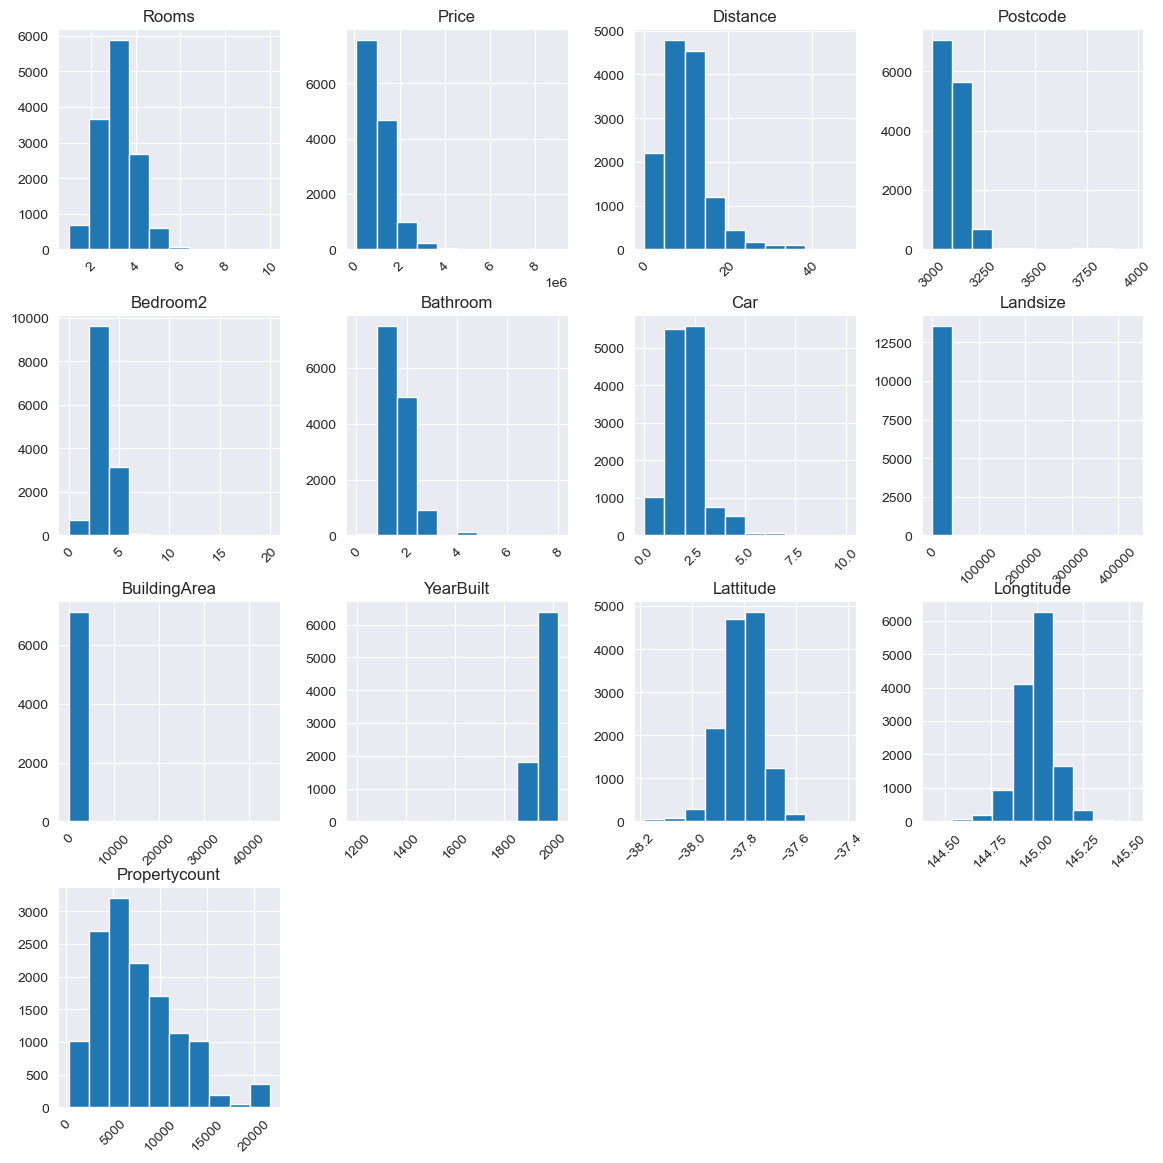

In [10]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

# According to the plot
From the histogram, I noted that BuildingArea and LandSize had potential outliers to the right. 
Our target feature Price was also highly skewed to the right. 
I also noted that YearBuilt was very skewed to the left and the boundary started at the year 1200 which was oddAccording to the plot

In [11]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [12]:
data.describe(include = 'object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


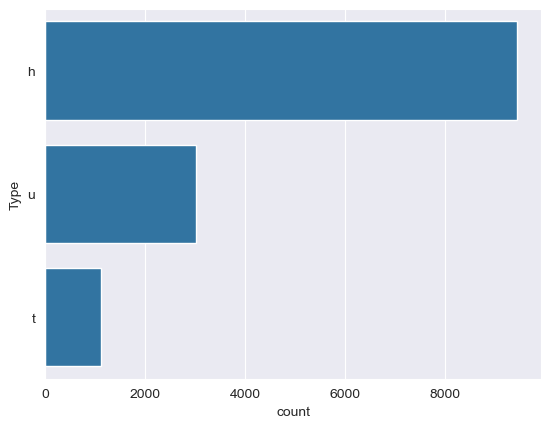

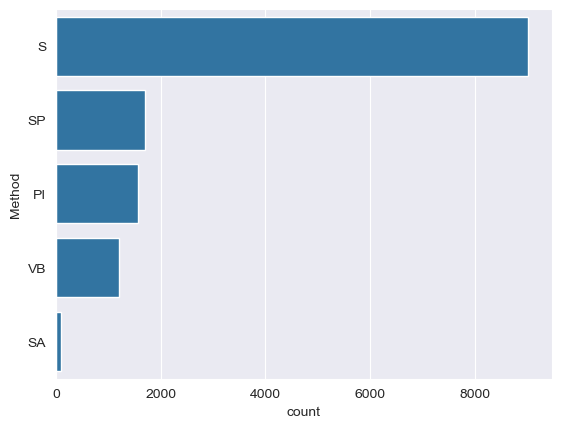

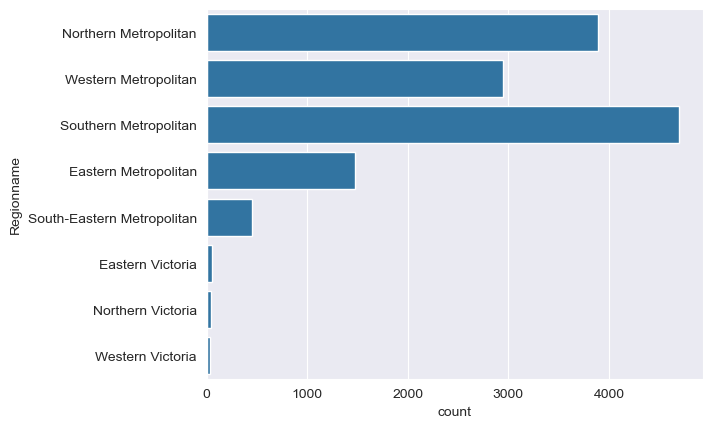

In [13]:
for column in data.select_dtypes(include='object'):
    if data [column].nunique() < 10:
        sns.countplot(y=column,data=data)
        plt.show()

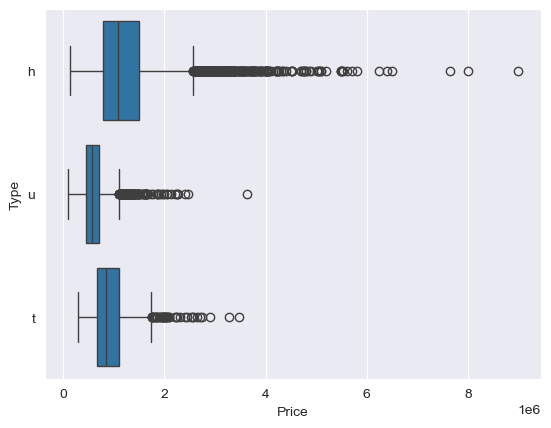

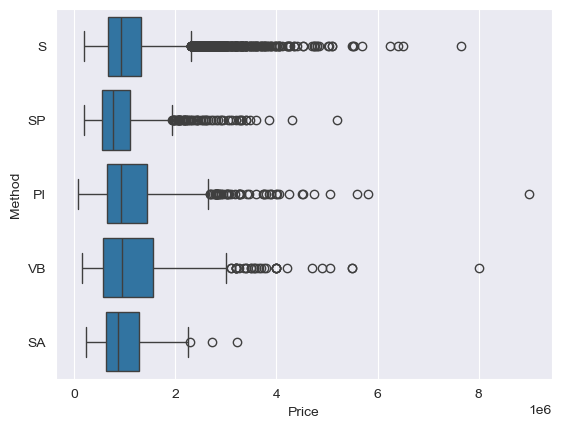

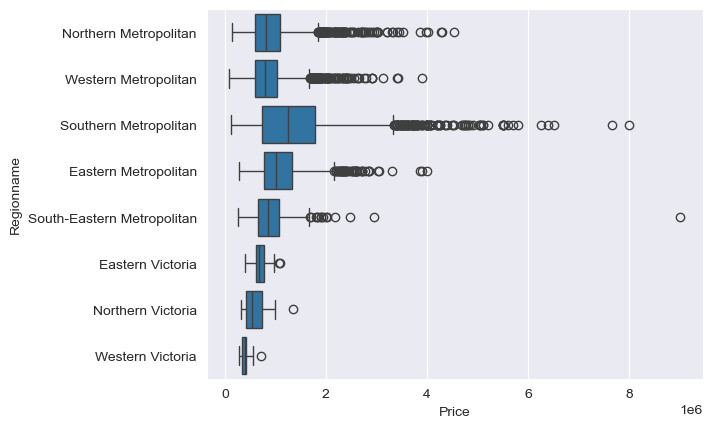

In [14]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.boxplot(y=column, x = 'Price', data=data)
        plt.show()

# In the Boxplot above, Price is still sparsely distributed among the 3 sparse classes of Regionname seen earlier, strengthening our case against these classes. SA class (the least frequent Method class) commands high prices, almost similar prices of the most frequently occurring class S.

In [17]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        # Select only numeric columns for mean calculation
        numeric_cols = data.select_dtypes(include='number').columns
        display(data.groupby(column)[numeric_cols].mean())

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Type,,,,,,,,,,,,,
h,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.771222,617.181924,176.866248,1954.081176,-37.803795,144.994700,7259.025505
t,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,140.046323,1998.988189,-37.815782,144.996489,7094.459605
u,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128358,477.314219,80.737121,1980.016708,-37.823710,144.996363,8199.280080


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Method,,,,,,,,,,,,,
PI,3.077366,1.133242e+06,9.482097,3106.742327,3.062660,1.714194,1.703918,521.682864,158.783107,1965.621106,-37.814429,145.001865,7749.644501
S,2.941809,1.087327e+06,10.431523,3106.171359,2.914875,1.498781,1.602581,531.129905,155.781647,1963.382091,-37.808204,144.997012,7496.049435
SA,3.010870,1.025772e+06,12.385870,3132.304348,3.010870,1.554348,1.769231,699.532609,151.454318,1979.340000,-37.818112,145.023262,6945.902174
SP,2.795655,8.998924e+05,10.374692,3096.480916,2.785672,1.456254,1.560472,469.346447,128.631366,1968.742958,-37.804809,144.972983,7093.759248
VB,2.924103,1.166510e+06,8.273728,3107.337781,2.896580,1.675563,1.602359,927.331943,152.419093,1965.464807,-37.815460,145.002459,7307.331943


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,
Eastern Metropolitan,3.322230,1.104080e+06,13.901088,3111.162475,3.313392,1.698844,1.792916,634.133923,178.001521,1971.859903,-37.788820,145.129184,5713.788579
Eastern Victoria,3.396226,6.999808e+05,34.209434,3567.584906,3.396226,1.811321,2.056604,2949.698113,183.645000,1984.032258,-37.959292,145.324428,8872.358491
Northern Metropolitan,2.755527,8.981711e+05,8.078329,3071.360925,2.734190,1.367866,1.454123,568.948072,124.177723,1962.764286,-37.747258,144.981176,9485.602057
Northern Victoria,3.560976,5.948293e+05,33.748780,3418.707317,3.560976,1.853659,1.925000,3355.463415,1746.374286,1986.666667,-37.599620,144.838486,4260.975610
South-Eastern Metropolitan,3.360000,9.229438e+05,23.813556,3225.255556,3.355556,1.657778,2.044444,613.991111,162.734296,1976.859504,-37.993727,145.145865,6589.366667
Southern Metropolitan,2.860916,1.372963e+06,8.756656,3156.714590,2.835144,1.624068,1.576264,509.252183,153.580962,1960.523777,-37.866981,145.034312,7622.279233
Western Metropolitan,3.023406,8.664205e+05,10.104579,3031.781208,2.990502,1.501018,1.696392,493.606852,144.697623,1968.155192,-37.782382,144.862512,5561.785957
Western Victoria,3.406250,3.975234e+05,30.753125,3337.687500,3.406250,1.468750,1.843750,655.500000,134.683810,1982.565217,-37.695163,144.569906,4191.156250


In [22]:
# Loop through object or category columns
for column in data.select_dtypes(include=['object', 'category']):
    # Only work with columns having fewer than 10 unique values
    if data[column].nunique() < 10:
        # Select numeric columns only
        numeric_cols = data.select_dtypes(include='number').columns

        # Group by the categorical column and compute mean only for numeric columns
        grouped_means = data.groupby(column)[numeric_cols].mean()

        # Display the result
        display(grouped_means)


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Type,,,,,,,,,,,,,
h,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.771222,617.181924,176.866248,1954.081176,-37.803795,144.994700,7259.025505
t,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,140.046323,1998.988189,-37.815782,144.996489,7094.459605
u,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128358,477.314219,80.737121,1980.016708,-37.823710,144.996363,8199.280080


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Method,,,,,,,,,,,,,
PI,3.077366,1.133242e+06,9.482097,3106.742327,3.062660,1.714194,1.703918,521.682864,158.783107,1965.621106,-37.814429,145.001865,7749.644501
S,2.941809,1.087327e+06,10.431523,3106.171359,2.914875,1.498781,1.602581,531.129905,155.781647,1963.382091,-37.808204,144.997012,7496.049435
SA,3.010870,1.025772e+06,12.385870,3132.304348,3.010870,1.554348,1.769231,699.532609,151.454318,1979.340000,-37.818112,145.023262,6945.902174
SP,2.795655,8.998924e+05,10.374692,3096.480916,2.785672,1.456254,1.560472,469.346447,128.631366,1968.742958,-37.804809,144.972983,7093.759248
VB,2.924103,1.166510e+06,8.273728,3107.337781,2.896580,1.675563,1.602359,927.331943,152.419093,1965.464807,-37.815460,145.002459,7307.331943


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,
Eastern Metropolitan,3.322230,1.104080e+06,13.901088,3111.162475,3.313392,1.698844,1.792916,634.133923,178.001521,1971.859903,-37.788820,145.129184,5713.788579
Eastern Victoria,3.396226,6.999808e+05,34.209434,3567.584906,3.396226,1.811321,2.056604,2949.698113,183.645000,1984.032258,-37.959292,145.324428,8872.358491
Northern Metropolitan,2.755527,8.981711e+05,8.078329,3071.360925,2.734190,1.367866,1.454123,568.948072,124.177723,1962.764286,-37.747258,144.981176,9485.602057
Northern Victoria,3.560976,5.948293e+05,33.748780,3418.707317,3.560976,1.853659,1.925000,3355.463415,1746.374286,1986.666667,-37.599620,144.838486,4260.975610
South-Eastern Metropolitan,3.360000,9.229438e+05,23.813556,3225.255556,3.355556,1.657778,2.044444,613.991111,162.734296,1976.859504,-37.993727,145.145865,6589.366667
Southern Metropolitan,2.860916,1.372963e+06,8.756656,3156.714590,2.835144,1.624068,1.576264,509.252183,153.580962,1960.523777,-37.866981,145.034312,7622.279233
Western Metropolitan,3.023406,8.664205e+05,10.104579,3031.781208,2.990502,1.501018,1.696392,493.606852,144.697623,1968.155192,-37.782382,144.862512,5561.785957
Western Victoria,3.406250,3.975234e+05,30.753125,3337.687500,3.406250,1.468750,1.843750,655.500000,134.683810,1982.565217,-37.695163,144.569906,4191.156250


In [21]:
# Check for non-numeric values in numeric-looking columns
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"{col}: {data[col].unique()}")

Suburb: ['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' 'Niddrie' 'North Melbourne' 'No

In [25]:
data['Suburb'] = data['Suburb'].replace('Abbotsford', 1) #replaced the abbotsford with 1

In [27]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,1,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,1,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,1,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
#Convert all non-numeric object columns into numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Choose the non-numeric columns to encode
cols_to_encode = ['Suburb', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

for col in cols_to_encode:
    data[col] = le.fit_transform(data[col].astype(str))

In [35]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [36]:
data.head()

,Suburb,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,1480000.0,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,0,2,1035000.0,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,0,3,1465000.0,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,0,3,850000.0,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,0,4,1600000.0,2016-06-04,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [44]:
data.head()

,Suburb,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,CouncilArea_Kingston,CouncilArea_Knox,CouncilArea_Macedon Ranges,CouncilArea_Manningham,CouncilArea_Maribyrnong,CouncilArea_Maroondah,CouncilArea_Melbourne,CouncilArea_Melton,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moorabool,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,0,2,1480000.0,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,2,1035000.0,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,3,1465000.0,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,3,850000.0,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,Northern Metropolitan,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,4,1600000.0,2016-06-04,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [50]:
#Automatically Encode All Categorical Columns
for col in data.select_dtypes(include='object').columns:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

In [48]:
data.head()

,Suburb,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,CouncilArea_Kingston,CouncilArea_Knox,CouncilArea_Macedon Ranges,CouncilArea_Manningham,CouncilArea_Maribyrnong,CouncilArea_Maroondah,CouncilArea_Melbourne,CouncilArea_Melton,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moorabool,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,0,2,1480000.0,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,2,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,2,1035000.0,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,2,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,3,1465000.0,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,2,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,3,850000.0,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,2,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,4,1600000.0,2016-06-04,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,2,4019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [47]:
corrs = data.corr()
corrs

,Suburb,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,CouncilArea_Kingston,CouncilArea_Knox,CouncilArea_Macedon Ranges,CouncilArea_Manningham,CouncilArea_Maribyrnong,CouncilArea_Maroondah,CouncilArea_Melbourne,CouncilArea_Melton,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moorabool,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
Suburb,1.000000,-0.060510,-0.135830,0.013342,-0.039550,-0.057947,-0.059578,-0.059516,-0.031283,0.000796,-0.007406,0.018959,0.137892,-0.140629,-0.010919,0.142738,-0.161163,-0.153020,0.122370,-0.005023,-0.028306,0.214478,0.003605,-0.206208,0.001584,0.056395,0.006006,0.005932,0.011864,-0.004820,-0.008432,0.152745,-0.005526,0.082174,0.009072,-0.004474,-0.107175,-0.012953,-0.148199,-0.020618,0.082826,0.126124,-0.001075,-0.032514,0.041054,0.084143,-0.030959,0.019128
Rooms,-0.060510,1.000000,0.496634,0.120298,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.028661,-0.081530,0.050172,0.058696,0.035570,0.017452,0.026774,-0.044478,0.026305,-0.028794,0.017745,0.016606,0.042443,0.031969,0.050302,0.011657,0.104707,-0.040676,0.021104,-0.141151,0.042203,0.057116,0.013830,0.000557,-0.024200,0.034813,-0.150077,-0.125393,0.000557,0.054088,0.041496,0.033347,-0.133432,0.012952
Price,-0.135830,0.496634,1.000000,0.017400,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,0.079109,-0.042153,0.174285,0.273221,-0.120326,-0.019086,-0.034742,-0.067968,-0.040800,-0.002586,-0.036719,-0.021246,-0.088943,-0.019086,-0.021770,-0.015776,0.038191,-0.095685,-0.027052,-0.044474,-0.062973,0.022967,-0.038899,-0.010614,-0.119263,-0.017449,0.023650,0.080517,0.003347,0.037526,-0.077658,-0.067917,0.018166,-0.018767
Date,0.013342,0.120298,0.017400,1.000000,0.294782,0.122618,0.145376,0.059483,0.107857,0.031611,0.022572,0.108589,-0.004414,0.089520,-0.098271,0.000211,-0.031393,-0.089166,-0.007408,0.025020,0.052664,-0.086523,0.060733,-0.097239,0.059672,-0.049140,0.089361,0.045118,0.074554,0.023263,-0.015538,-0.067897,0.074595,-0.063344,0.067767,0.039037,-0.081475,0.008473,-0.078420,0.051028,-0.068921,-0.070307,0.007732,0.016791,0.107981,0.077501,-0.068817,0.034049
Distance,-0.039550,0.294203,-0.162522,0.294782,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.096808,-0.054910,0.071419,-0.123732,0.098561,0.133834,0.204515,-0.071159,0.286900,0.069842,0.144622,-0.025339,0.153237,0.185158,0.152290,0.139220,0.088006,-0.106435,0.153635,-0.241456,0.167909,0.106585,-0.074520,0.040012,-0.076917,0.072268,-0.191864,-0.166863,0.005355,0.075712,0.156857,0.089522,-0.282646,0.119234
Postcode,-0.057947,0.055303,0.107867,0.122618,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,-0.010656,0.062304,0.175042,0.045509,-0.162351,0.187450,0.378776,-0.098683,0.141452,0.198974,0.046907,-0.176783,-0.016681,0.113398,0.046193,0.082861,0.003274,-0.230621,0.026338,-0.120812,0.073944,0.088906,-0.210621,0.022212,-0.177952,-0.006347,0.213555,0.118834,0.007827,0.039697,0.134802,-0.066882,-0.038462,0.099097
Bedroom2,-0.059578,0.944190,0.475951,0.145376,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.034797,-0.081350,0.049389,0.050165,0.037329,0.017853,0.027769,-0.046801,0.027536,-0.026369,0.019052,0.011273,0.043962,0.030896,0.051627,0.012081,0.106782,-0.046452,0.021740,-0.145113,0.044539,0.053925,0.010236,0.000758,-0.024201,0.035688,-0.145006,-0.120078,0.000758,

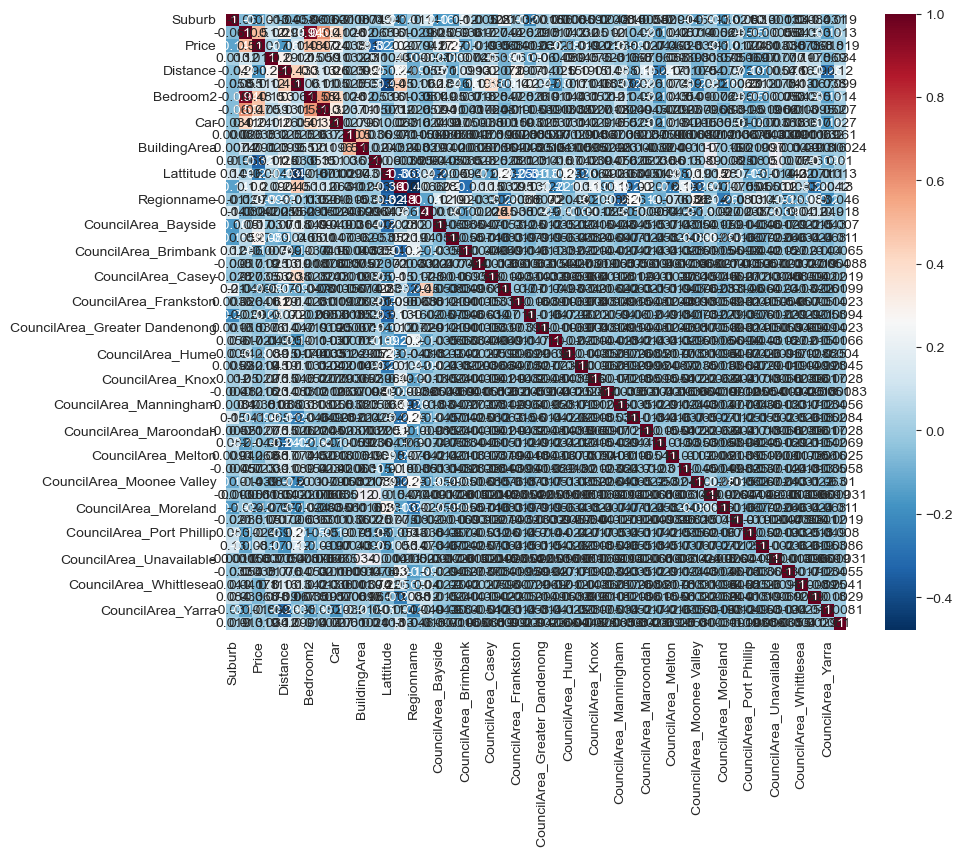

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()